<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/color_segmentation_using_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import warnings
import matplotlib.pyplot as plt
import cv2
warnings.filterwarnings("ignore")
import itertools
#%matplotlib inline

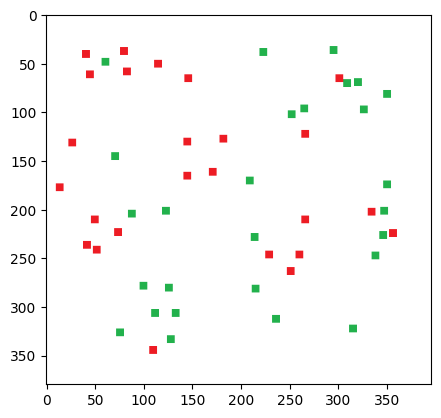

In [ ]:
image = cv2.imread('/content/check.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [ ]:
data = image.reshape((-1,3))
data = np.float32(data)

data

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]], dtype=float32)

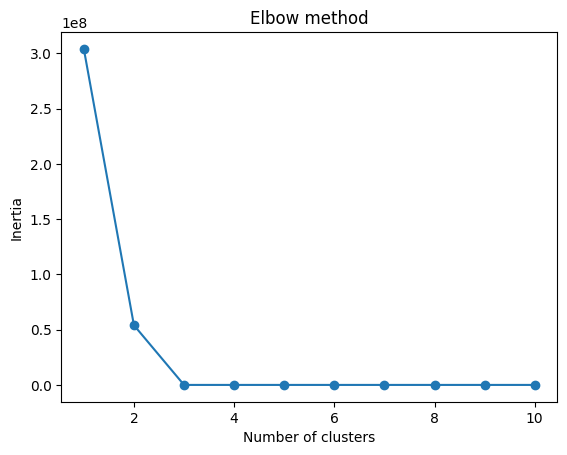

In [ ]:
inertias = []
for i in range(1, min(len(data), 10) + 1):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=1)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, min(len(data), 10) + 1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 3
retval, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_data


array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

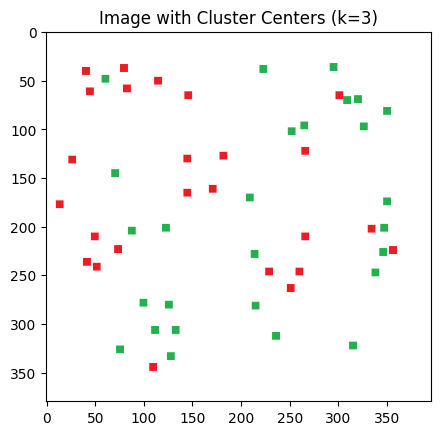

In [ ]:
labels_reshaped = labels.reshape(image.shape[:2])

image_with_circles = image.copy()

for i, center in enumerate(centers):
    center_x, center_y = map(int, center[:2])
    # cv2.circle(image_with_circles, (center_x, center_y), radius=10, color=(0, 0, 255), thickness=2)

plt.imshow(image_with_circles)
plt.title(f"Image with Cluster Centers (k={k})")
plt.show()

In [ ]:
print("Cluster Centers (RGB values):")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")
print("\nClustered Data Points:")
for cluster_num in range(k):
    cluster_points = data[labels.flatten() == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_points)

Cluster Centers (RGB values):
Cluster 0: [255 255 255]
Cluster 1: [ 34 177  76]
Cluster 2: [237  28  36]

Clustered Data Points:
Cluster 0:
[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 ...
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]
Cluster 1:
[[ 34. 177.  76.]
 [ 34. 177.  76.]
 [ 34. 177.  76.]
 ...
 [ 34. 177.  76.]
 [ 34. 177.  76.]
 [ 34. 177.  76.]]
Cluster 2:
[[237.  28.  36.]
 [237.  28.  36.]
 [237.  28.  36.]
 ...
 [237.  28.  36.]
 [237.  28.  36.]
 [237.  28.  36.]]


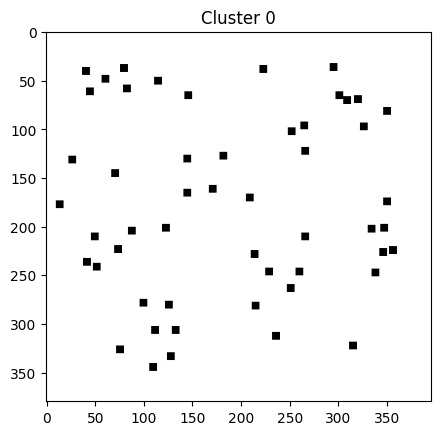

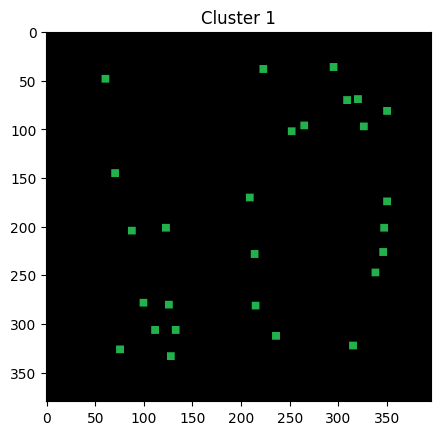

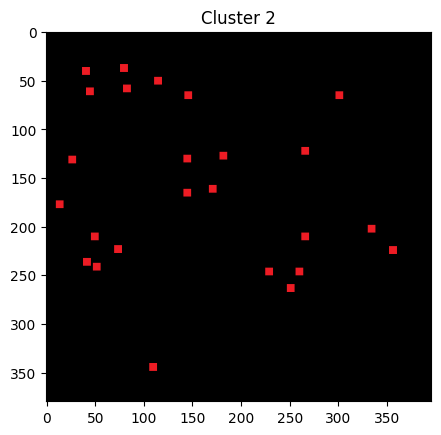

In [ ]:
segmented_image = segmented_data.reshape(image.shape)

cluster_images = []
for cluster_num in range(k):
    mask = labels.flatten() == cluster_num

    cluster_image = np.zeros_like(segmented_image)
    cluster_image[mask.reshape(image.shape[:2])] = segmented_image[mask.reshape(image.shape[:2])]

    cluster_images.append(cluster_image)

for i, cluster_image in enumerate(cluster_images):
    plt.figure()
    plt.imshow(cluster_image)
    plt.title(f"Cluster {i}")
    plt.show()

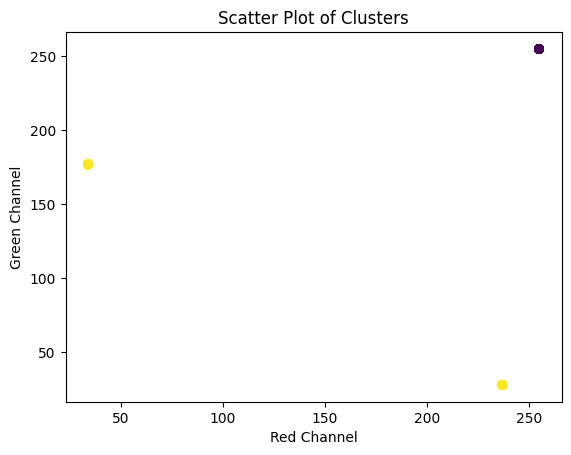

In [ ]:
X = data[:, :2]
y = labels.flatten()
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.xlabel("Red Channel")
plt.ylabel("Green Channel")
plt.title("Scatter Plot of Clusters")
plt.show()